In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1000_salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,R_yn,excel_yn,AWS_yn,SQL_yn
0,Data Scientist,$90K-$146K\n(Glassdoor Est.),WHO WE ARE\n\n\nPostmates enables anyone to ha...,3.3,Postmates\n3.3,"San Francisco, CA",1001 to 5000 Employees,2011,Company - Private,Express Delivery Services,...,146,118.0,Postmates\n,CA,9,1,0,0,0,1
1,Lead Data Scientist (Life Insurance),$78K-$131K\n(Glassdoor Est.),REPORTS TO: Director of Finance\n\nFLSA STATUS...,4.5,Covr Financial Technologies\n4.5,"Hartford, CT",51 to 200 Employees,2016,Company - Private,Enterprise Software & Network Solutions,...,131,104.5,Covr Financial Technologies\n,CT,4,0,0,1,0,1
2,Sr. Data Scientist,$71K-$118K\n(Glassdoor Est.),Overview:\n\nMedifast is seeking a full-time S...,2.9,"Medifast, Inc.\n2.9","Baltimore, MD",501 to 1000 Employees,1980,Company - Public,"Health, Beauty, & Fitness",...,118,94.5,"Medifast, Inc.\n",MD,40,1,0,0,1,1
3,STAFF SCIENTIST,$24K-$51K\n(Glassdoor Est.),Position: Staff Scientist\n\nRequisition Numbe...,3.6,"S&ME, Inc.\n3.6","Chattanooga, TN",1001 to 5000 Employees,1973,Company - Private,Architectural & Engineering Services,...,51,37.5,"S&ME, Inc.\n",TN,47,0,0,0,0,0
4,Data Scientist,$80K-$111K\n(Glassdoor Est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"Atlanta, GA",201 to 500 Employees,1985,Company - Private,Insurance Carriers,...,111,95.5,IFG Companies\n,GA,35,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    elif 'intern' in title.lower():
        return 'intern'
    else:
        return 'na'
    
## Job title and seniortiy

## Fix state 

## Job description length

## hourly wage to annual

## remove new line from job title

    

In [6]:
## Job title
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist      429
analyst              99
na                   84
data engineer        57
machine learning     36
manager               9
director              3
Name: job_simp, dtype: int64

In [7]:
## Job seniortiy
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        599
senior    117
junior      1
Name: seniority, dtype: int64

In [8]:
# Fixed state Los Angeles
df['Job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.Job_state.value_counts()
df.drop('job_state', inplace = True, axis = 1)

In [9]:
#Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      4166
1      6303
2      3165
3      2388
4      2692
       ... 
712    1162
713    4195
714    3896
715    4508
716    6328
Name: desc_len, Length: 717, dtype: int64

In [10]:
# Competitor count
# df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
# df['num_comp']
# df['Competitors']

In [11]:
# hourly wage to annual
# what about man salary of hourly wage
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
#df.min_salary
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
192,1,26,54
545,1,118,192


In [12]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace("\n",""))
df['company_txt']

0                           Postmates
1         Covr Financial Technologies
2                      Medifast, Inc.
3                          S&ME, Inc.
4                       IFG Companies
                    ...              
712    Center for Applied Linguistics
713                            Criteo
714                        Foursquare
715             Blue River Technology
716                 Reynolds American
Name: company_txt, Length: 717, dtype: object

In [13]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,R_yn,excel_yn,AWS_yn,SQL_yn,desc_len
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,3.718689,1820.820084,0.002789,0.008368,79.157601,129.005579,103.945607,38.435146,0.704324,0.002789,0.493724,0.235704,0.567643,3801.256625
std,0.695887,537.432953,0.052778,0.091158,29.077463,42.699580,35.253390,43.874476,0.456665,0.052778,0.500310,0.424735,0.495749,1522.342414
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,327.000000
25%,3.400000,1951.000000,0.000000,0.000000,60.000000,103.000000,82.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2856.000000
50%,3.800000,1994.000000,0.000000,0.000000,77.000000,126.000000,102.000000,22.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3711.000000
75%,4.100000,2007.000000,0.000000,0.000000,94.000000,147.000000,120.000000,52.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4642.000000
max,5.000000,2019.000000,1.000000,1.000000,205.000000,336.000000,270.500000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13336.000000


In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn', 'job_simp',
       'seniority', 'Job_state', 'desc_len'],
      dtype='object')

<AxesSubplot:>

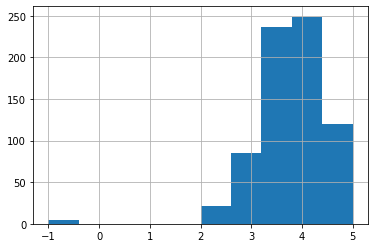

In [15]:
df.Rating.hist()

<AxesSubplot:>

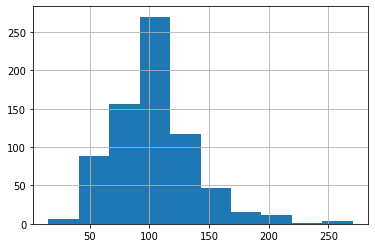

In [16]:
df.avg_salary.hist()

<AxesSubplot:>

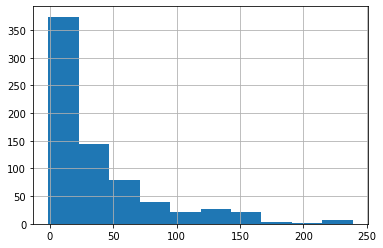

In [17]:
df.age.hist()

<AxesSubplot:>

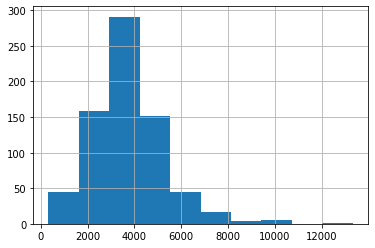

In [18]:
df.desc_len.hist() 

<AxesSubplot:>

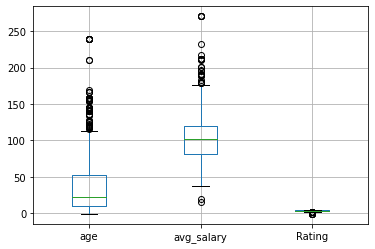

In [19]:
df.boxplot(column=['age','avg_salary','Rating'])

<AxesSubplot:>

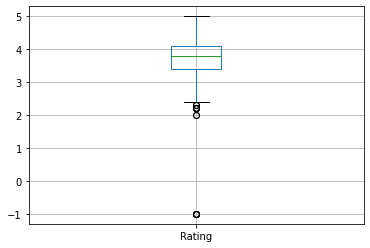

In [20]:
df.boxplot(column=['Rating'])

In [21]:
df[['age','avg_salary','desc_len','Rating']].corr()

,age,avg_salary,desc_len,Rating
age,1.000000,-0.114318,0.264546,-0.002577
avg_salary,-0.114318,1.000000,0.089975,0.028999
desc_len,0.264546,0.089975,1.000000,-0.006265
Rating,-0.002577,0.028999,-0.006265,1.000000


<AxesSubplot:>

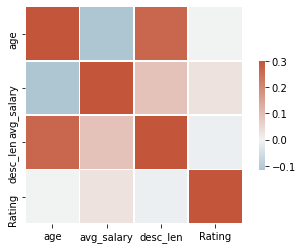

In [22]:

# Correlation between age, avg_salary, desc_len, and Rating with seaborn #


#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['age','avg_salary','desc_len','Rating']].corr(), cmap=cmap , vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
df_cat = df[['Location','Size','company_txt','Type of ownership','Industry','Sector', 'Revenue', 'Job_state','python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn','job_simp','seniority']]

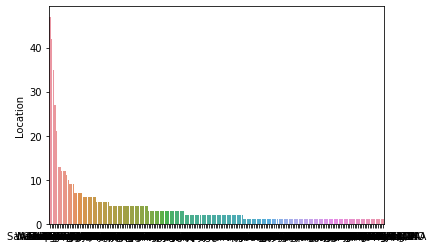

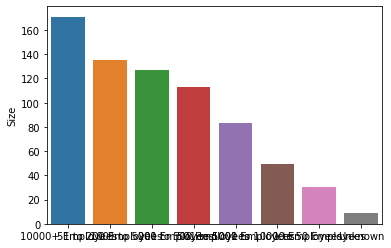

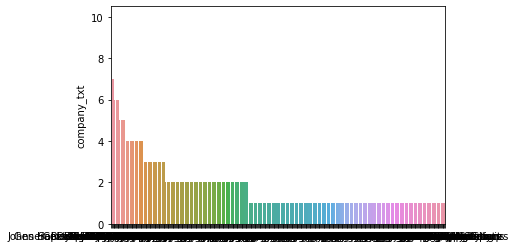

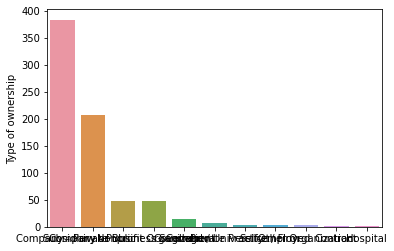

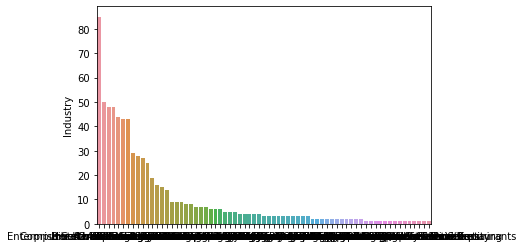

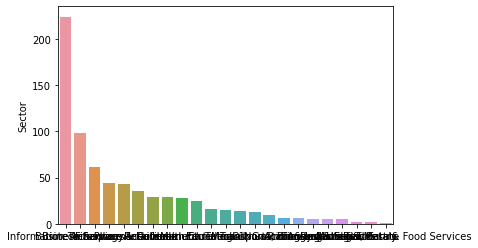

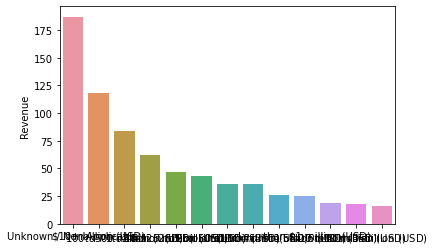

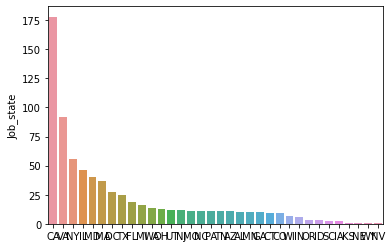

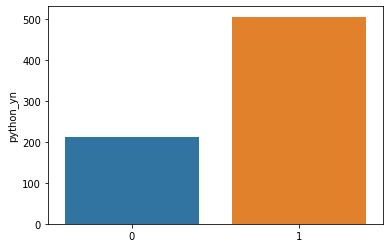

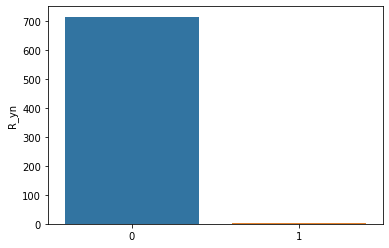

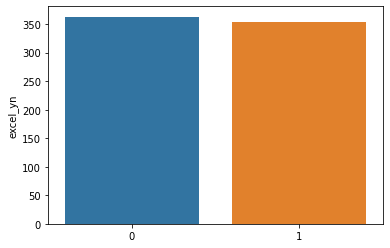

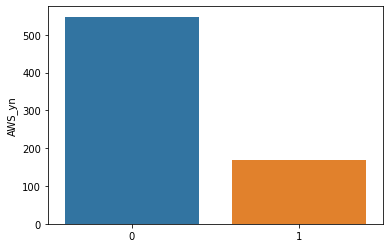

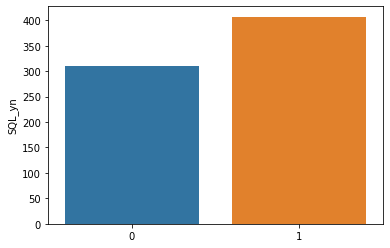

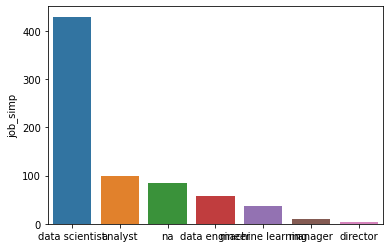

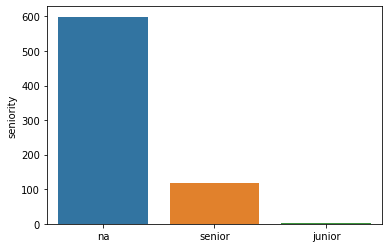

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

graph for Location: total = 200


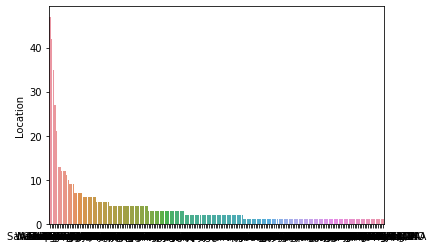

graph for Size: total = 8


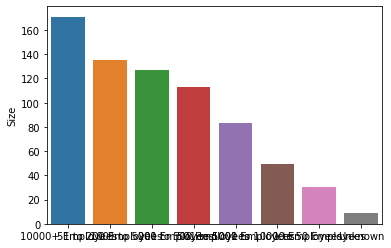

graph for company_txt: total = 408


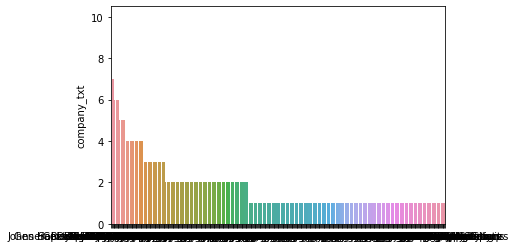

graph for Type of ownership: total = 11


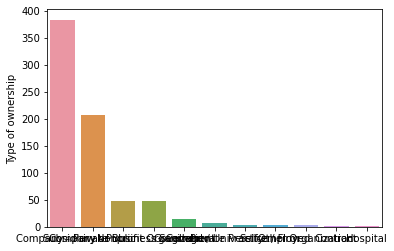

graph for Industry: total = 69


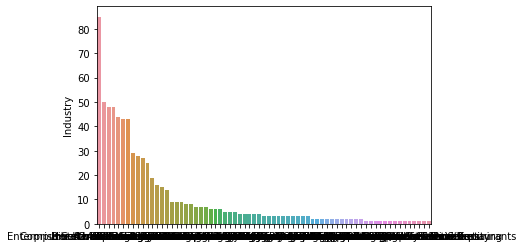

graph for Sector: total = 23


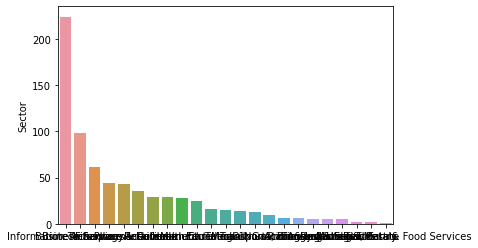

graph for Revenue: total = 13


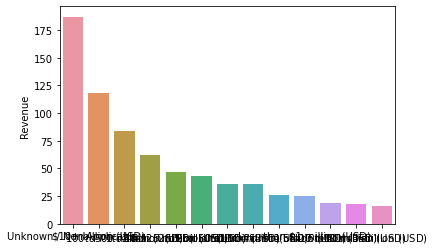

graph for Job_state: total = 34


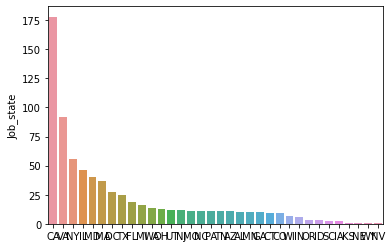

graph for python_yn: total = 2


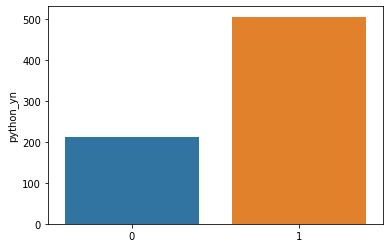

graph for R_yn: total = 2


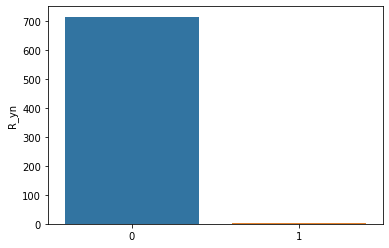

graph for excel_yn: total = 2


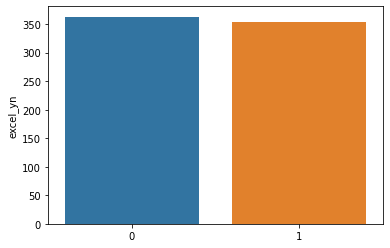

graph for AWS_yn: total = 2


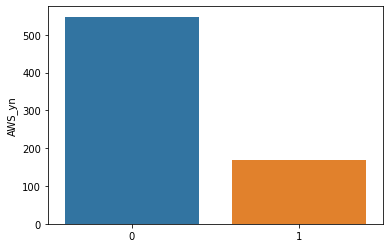

graph for SQL_yn: total = 2


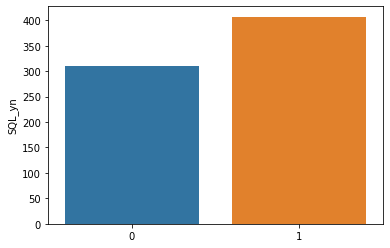

graph for job_simp: total = 7


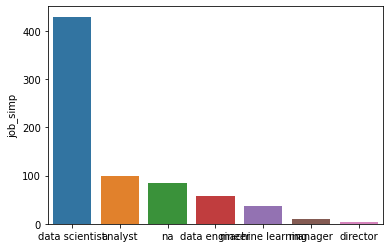

graph for seniority: total = 3


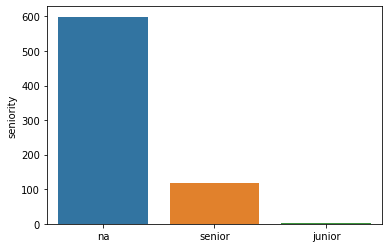

In [25]:
# a little clearer version?
for i in df_cat.columns: # the first df_cat.columns is Location 
    cat_num = df_cat[i].value_counts()     # Count the number of columns in Location
    print("graph for %s: total = %d" %(i, len(cat_num)))    # The first i is Location and the total number of columns is 200
    sns.barplot(x=cat_num.index, y=cat_num)   # x = each value in Location and y = how many values each column has
    plt.show()

graph for Location: total = 200


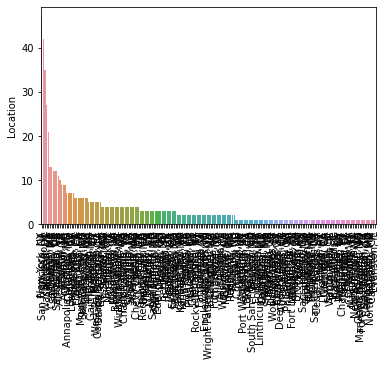

graph for Size: total = 8


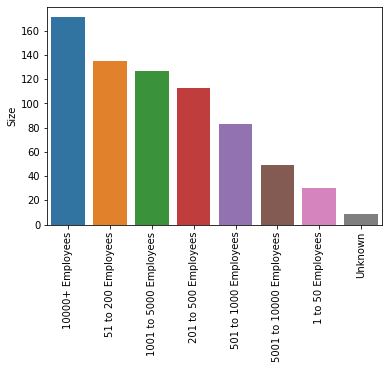

graph for company_txt: total = 408


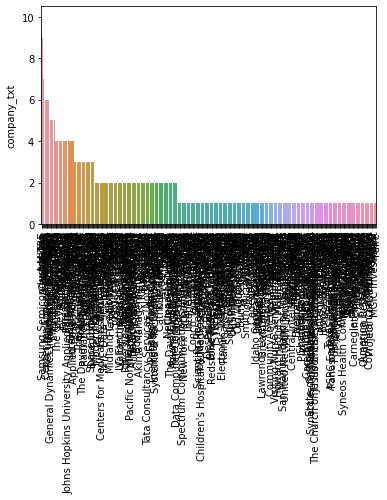

graph for Type of ownership: total = 11


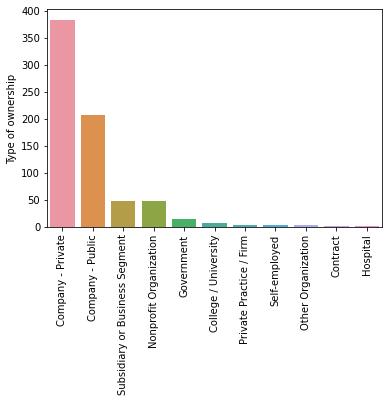

graph for Industry: total = 69


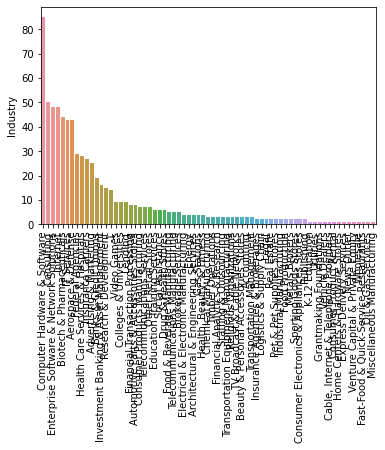

graph for Sector: total = 23


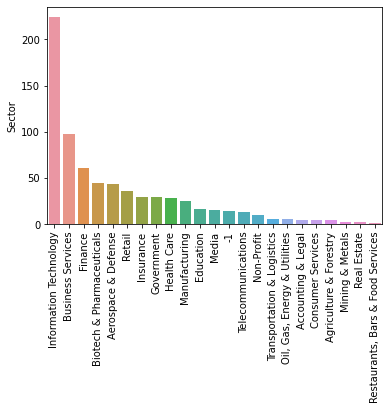

graph for Revenue: total = 13


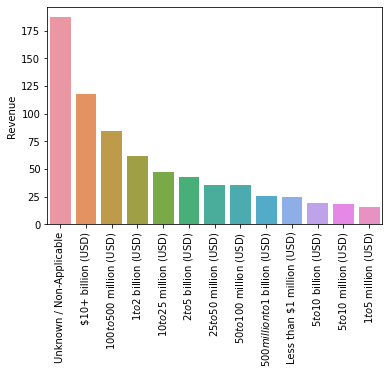

graph for Job_state: total = 34


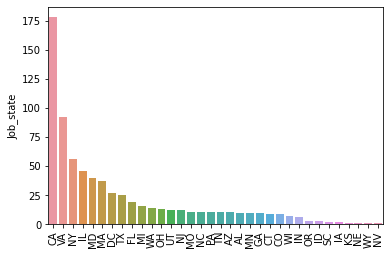

graph for python_yn: total = 2


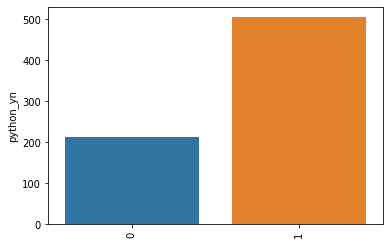

graph for R_yn: total = 2


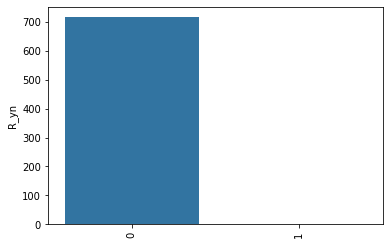

graph for excel_yn: total = 2


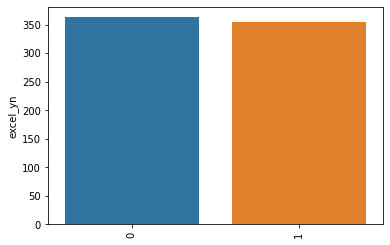

graph for AWS_yn: total = 2


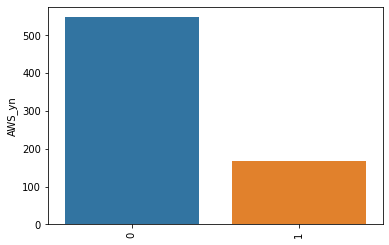

graph for SQL_yn: total = 2


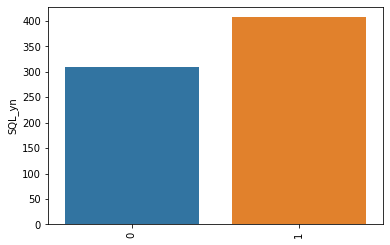

graph for job_simp: total = 7


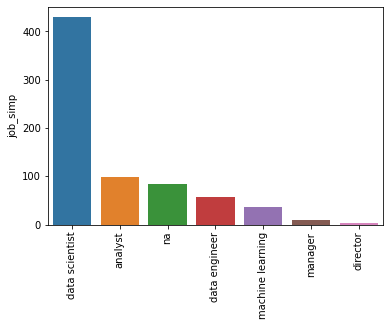

graph for seniority: total = 3


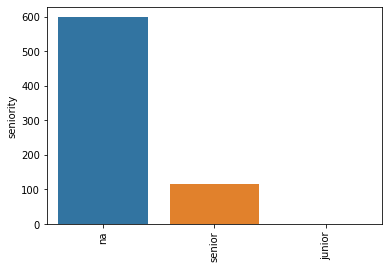

In [26]:
# a little clearer version?
for i in df_cat.columns: # the first df_cat.columns is Location 
    cat_num = df_cat[i].value_counts()     # Count the number of columns in Location
    print("graph for %s: total = %d" %(i, len(cat_num)))    # The first i is Location and the total number of columns is 200
    chart = sns.barplot(x=cat_num.index, y=cat_num)   # x = each value in Location and y = how many values each column has
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)   # rotate x aix to 90 degrees
    plt.show()

graph for Location: total = 20


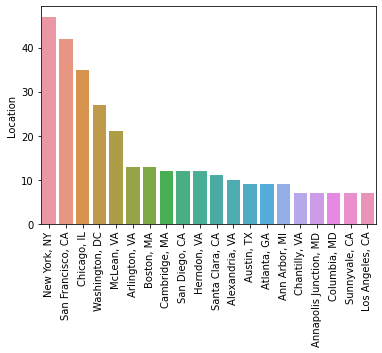

graph for company_txt: total = 20


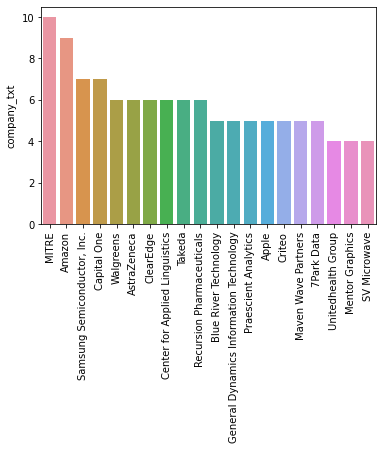

graph for Job_state: total = 20


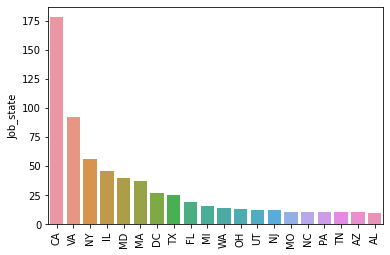

In [27]:
# a little clearer version?
for i in df_cat[['Location','company_txt','Job_state']].columns: 
    cat_num = df_cat[i].value_counts()[:20]     
    print("graph for %s: total = %d" %(i, len(cat_num)))    
    chart = sns.barplot(x=cat_num.index, y=cat_num)   
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)   
    plt.show()

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn', 'job_simp',
       'seniority', 'Job_state', 'desc_len'],
      dtype='object')

In [29]:
pd.pivot_table(df, index='job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,72.202020
data engineer,103.394737
data scientist,110.505828
director,122.166667
machine learning,135.986111
manager,73.277778
na,97.130952


In [30]:
pd.pivot_table(df, index=['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp         seniority            
analyst          na          65.367647
                 senior      87.193548
data engineer    na         100.297872
                 senior     117.950000
data scientist   junior      98.500000
                 na         105.661039
                 senior     154.162791
director         na         122.166667
machine learning na         125.750000
                 senior     162.600000
manager          na          45.000000
                 senior     108.625000
na               na          90.623077
                 senior     119.394737

In [31]:
pd.pivot_table(df, index='Job_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
Job_state,
NY,126.678571
CA,124.410112
MA,116.135135
NJ,111.333333
KS,111.000000
MD,105.725000
VA,102.054348
TX,98.460000
OR,98.333333


In [32]:
pd.pivot_table(df, index=['Job_state','job_simp'], values = 'avg_salary').sort_values('Job_state', ascending=False)

avg_salary
Job_state job_simp                    
WY        analyst                60.00
WI        na                     77.00
          data scientist        100.50
          analyst                59.00
WA        na                     78.50
...                                ...
AZ        data engineer          95.50
          analyst                71.50
          machine learning       75.50
          na                    233.00
AL        data scientist         83.55

[108 rows x 1 columns]

In [33]:
pd.options.display.max_rows     # Display the total number of rows
pd.set_option('display.max_rows',None)    # Display all rows 
pd.pivot_table(df, index=['Job_state','job_simp'], values = 'avg_salary').sort_values('Job_state', ascending=False)

avg_salary
Job_state job_simp                    
WY        analyst            60.000000
WI        na                 77.000000
          data scientist    100.500000
          analyst            59.000000
WA        na                 78.500000
          machine learning  201.500000
          data scientist     91.850000
VA        na                118.928571
          machine learning   92.500000
          data scientist    102.785714
          data engineer      97.909091
          analyst            90.812500
UT        data scientist    120.666667
          data engineer      68.000000
          na                 61.000000
          machine learning   95.500000
TX        machine learning   94.000000
          data scientist    105.428571
          data engineer      93.666667
          analyst            82.375000
TN        na                 37.500000
          data scientist     80.666667
          analyst            58.125000
SC        na                 76.500000
          analyst            49.500000
PA        data engineer      62.500000
          analyst            59.583333
          na                 77.500000
          data scientist     92.166667
OR        data scientist    122.000000
          analyst            51.000000
OH        na                 97.500000
          data scientist     87.500000
          analyst            55.000000
NY        analyst            55.700000
          na                212.500000
          machine learning  108.750000
          data scientist    125.953488
          data engineer     119.500000
NV        na                 55.500000
NJ        manager           122.500000
          data scientist    131.666667
          analyst            99.428571
NE        na                 20.000000
NC        na                 98.400000
          data scientist     81.833333
          analyst            59.000000
MO        data scientist     86.500000
          analyst            46.500000
MN        data scientist    106.125000
          data engineer     129.000000
          analyst            62.000000
MI        na                 45.500000
          machine learning  115.166667
          data scientist     98.666667
          data engineer      78.500000
MD        na                 91.222222
          data scientist    112.740000
          data engineer     105.250000
          analyst            84.250000
MA        na                 91.125000
          machine learning  164.600000
          director          115.500000
          data scientist    112.456522
          data engineer      97.333333
KS        data scientist    111.000000
IN        data scientist     94.250000
          analyst            59.250000
          na                104.000000
IL        na                 76.600000
          director          135.500000
          data scientist     94.031250
          data engineer     108.666667
          analyst            72.500000
ID        na                 62.000000
          data scientist     95.500000
          analyst            48.000000
IA        machine learning   95.500000
          data engineer      89.500000
GA        data scientist     96.357143
          data engineer      99.666667
FL        na                 67.500000
          manager            51.000000
          data scientist     93.428571
          data engineer      74.500000
          analyst            49.750000
DC        na                 54.500000
          data scientist    100.421053
          analyst            81.750000
CT        analyst            76.250000
          data scientist     89.500000
          na                 76.500000
CO        manager            76.500000
          data scientist    115.750000
          data engineer      64.000000
          analyst            55.000000
CA        analyst            89.894737
          na                108.888889
          manager            57.400000
          machine learning  161.566667
          data scientist    129.920561
          d

In [34]:
# aggfunc = 'count' counts and gives the sum of each value
pd.pivot_table(df, index=['Job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('Job_state', ascending=False)
# shows how many jobs each state is hiring 

avg_salary
Job_state job_simp                    
WY        analyst                    1
WI        na                         2
          data scientist             4
          analyst                    1
WA        na                         3
          machine learning           1
          data scientist            10
VA        na                         7
          machine learning           3
          data scientist            63
          data engineer             11
          analyst                    8
UT        data scientist             6
          data engineer              1
          na                         3
          machine learning           2
TX        machine learning           1
          data scientist            14
          data engineer              6
          analyst                    4
TN        na                         1
          data scientist             6
          analyst                    4
SC        na                         1
          analyst                    1
PA        data engineer              1
          analyst                    6
          na                         1
          data scientist             3
OR        data scientist             2
          analyst                    1
OH        na                         2
          data scientist             9
          analyst                    2
NY        analyst                    5
          na                         5
          machine learning           2
          data scientist            43
          data engineer              1
NV        na                         1
NJ        manager                    2
          data scientist             3
          analyst                    7
NE        na                         1
NC        na                         5
          data scientist             3
          analyst                    3
MO        data scientist             7
          analyst                    4
MN        data scientist             4
          data engineer              1
          analyst                    5
MI        na                         2
          machine learning           3
          data scientist             9
          data engineer              2
MD        na                         9
          data scientist            25
          data engineer              4
          analyst                    2
MA        na                         4
          machine learning           5
          director                   2
          data scientist            23
          data engineer              3
KS        data scientist             1
IN        data scientist             2
          analyst                    2
          na                         2
IL        na                         5
          director                   1
          data scientist            32
          data engineer              3
          analyst                    5
ID        na                         1
          data scientist             1
          analyst                    1
IA        machine learning           1
          data engineer              1
GA        data scientist             7
          data engineer              3
FL        na                         2
          manager                    1
          data scientist             7
          data engineer              1
          analyst                    8
DC        na                         6
          data scientist            19
          analyst                    2
CT        analyst                    4
          data scientist             3
          na                         2
CO        manager                    1
          data scientist             2
          data engineer              4
          analyst                    2
CA        analyst                   19
          na                        18
          manager                    5
          machine learning          15
          data scientist           107
          d

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='Job_state', values = 'avg_salary').sort_values('avg_salary', ascending=False)
# shows the difference of avg_salary between each state

,avg_salary
Job_state,
NJ,131.666667
CA,129.920561
NY,125.953488
OR,122.000000
UT,120.666667
CO,115.750000
MD,112.740000
MA,112.456522
KS,111.000000


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'age',
       'python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn', 'job_simp',
       'seniority', 'Job_state', 'desc_len'],
      dtype='object')

In [37]:
# [['Type of ownership','Rating', 'Industry', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn', 'avg_salary', 'desc_len']]

In [38]:
df_pivots = df[['Type of ownership','Rating', 'Industry', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'excel_yn', 'AWS_yn', 'SQL_yn', 'desc_len','avg_salary']]

In [39]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary'))

Type of ownership
                                avg_salary
Type of ownership                         
College / University            103.785714
Company - Private               104.485640
Company - Public                106.782609
Contract                         77.500000
Government                       98.071429
Hospital                        155.500000
Nonprofit Organization           91.648936
Other Organization               68.333333
Private Practice / Firm          97.875000
Self-employed                    68.000000
Subsidiary or Business Segment  105.670213
Rating
        avg_salary
Rating            
-1.0     99.500000
 2.0    140.000000
 2.2    237.000000
 2.3    102.500000
 2.4     72.500000
 2.5    111.200000
 2.6    123.000000
 2.7    102.833333
 2.8     63.714286
 2.9     96.815789
 3.0     93.868421
 3.1    104.964286
 3.2     96.116667
 3.3     85.230769
 3.4    101.538462
 3.5    102.121429
 3.6     91.671429
 3.7    113.120000
 3.8     91.075758
 3.9    114.08730

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [40]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary').sort_values('avg_salary', ascending=False))

Type of ownership
                                avg_salary
Type of ownership                         
Hospital                        155.500000
Company - Public                106.782609
Subsidiary or Business Segment  105.670213
Company - Private               104.485640
College / University            103.785714
Government                       98.071429
Private Practice / Firm          97.875000
Nonprofit Organization           91.648936
Contract                         77.500000
Other Organization               68.333333
Self-employed                    68.000000
Rating
        avg_salary
Rating            
 2.2    237.000000
 2.0    140.000000
 4.0    126.368421
 2.6    123.000000
 4.6    115.823529
 3.9    114.087302
 3.7    113.120000
 4.2    113.037037
 2.5    111.200000
 4.3    109.678571
 4.5    107.612903
 5.0    107.538462
 3.1    104.964286
 2.7    102.833333
 2.3    102.500000
 4.8    102.500000
 3.5    102.121429
 3.4    101.538462
 4.4    100.982759
 4.1     99.74390

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [41]:
pd.pivot_table(df_pivots, index= 'Revenue', columns ='python_yn', values ='avg_salary')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),101.529412,110.388889
$1 to $5 million (USD),77.000000,112.133333
$10 to $25 million (USD),84.694444,96.379310
$10+ billion (USD),111.736842,111.368687
$100 to $500 million (USD),80.732143,102.348214
$2 to $5 billion (USD),72.950000,102.818182
$25 to $50 million (USD),93.666667,111.203704
$5 to $10 billion (USD),56.500000,93.909091
$5 to $10 million (USD),83.200000,106.625000


In [42]:
pd.pivot_table(df_pivots, index= 'Revenue', columns ='python_yn', values ='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),17,45
$1 to $5 million (USD),1,15
$10 to $25 million (USD),18,29
$10+ billion (USD),19,99
$100 to $500 million (USD),28,56
$2 to $5 billion (USD),10,33
$25 to $50 million (USD),9,27
$5 to $10 billion (USD),8,11
$5 to $10 million (USD),10,8


In [43]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import nltx
from nltk.tockenize import word_tokenize

ImportError: cannot import name 'nltx' from 'nltk.corpus' (C:\Users\GIS\Anaconda3\lib\site-packages\nltk\corpus\__init__.py)

In [44]:
conda install scikit-learn


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "C:\Users\GIS\Anaconda3\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ImportError: No module named conda.cli
